In [1]:
import json
import numpy as np
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

import torch
from torch_geometric.datasets import TUDataset
from torch_geometric.loader import DataLoader

from Utilities import score
from Utilities import plot_matrix_runs, plot_results
from Utilities import Add_ID_Count_Neighbours, PairData, prepare_dataloader_distance_scale

from training import training_loop

from models import GCN_pairs_distance

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
dataset = TUDataset(root='/tmp/MUTAG_transformed', name='MUTAG', pre_transform=Add_ID_Count_Neighbours()) 

### Results with different choices for L1 distance.
Here we use:
- L1 distance with absolute homomorphism counts
- L1 distance with homomorphism count densities
- L1 distance with rescaled homomorphism count density (NOT PRESENT HERE).

In [3]:
train_loader, val_loader, test_loader = prepare_dataloader_distance_scale('data/homomorphism_counts/MUTAG_full_kernel_max_20_run1.homson', dataset, batch_size=32, dist='L1', device = device, scaling = 'counts')

In [8]:
model = GCN_pairs_distance(input_features=dataset.num_node_features, hidden_channels=64, output_embeddings=300, name='GCN_L1_Counts', dist = 'L1').to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.MSELoss().to(device)

In [9]:
train_losses, validation_losses = training_loop(model, train_loader, optimizer, criterion, val_loader, epoch_number=100, return_losses=True)

Epoch: 10 | Time for 10 epochs: 0m 22s
	Train Loss: 335476172558542.875
	 Val. Loss: 289071697637003.625
Epoch: 20 | Time for 10 epochs: 0m 24s
	Train Loss: 334821349683655.125
	 Val. Loss: 288491726819700.375
Epoch: 30 | Time for 10 epochs: 0m 28s
	Train Loss: 328965876925574.438
	 Val. Loss: 281662504423796.375
Epoch: 40 | Time for 10 epochs: 0m 26s
	Train Loss: 163727661964732.781
	 Val. Loss: 92692782704826.188
Epoch: 50 | Time for 10 epochs: 0m 26s
	Train Loss: 133505625485436.125
	 Val. Loss: 66327085627950.547
Epoch: 60 | Time for 10 epochs: 0m 27s
	Train Loss: 116529818511711.672
	 Val. Loss: 64839816076567.273
Epoch: 70 | Time for 10 epochs: 0m 26s
	Train Loss: 112078270454401.297
	 Val. Loss: 60669822739176.727
Epoch: 80 | Time for 10 epochs: 0m 27s
	Train Loss: 100717269850256.812
	 Val. Loss: 53601506522205.094
Epoch: 90 | Time for 10 epochs: 0m 26s
	Train Loss: 92609720689053.734
	 Val. Loss: 47433866280960.000
Epoch: 100 | Time for 10 epochs: 0m 23s
	Train Loss: 805364661

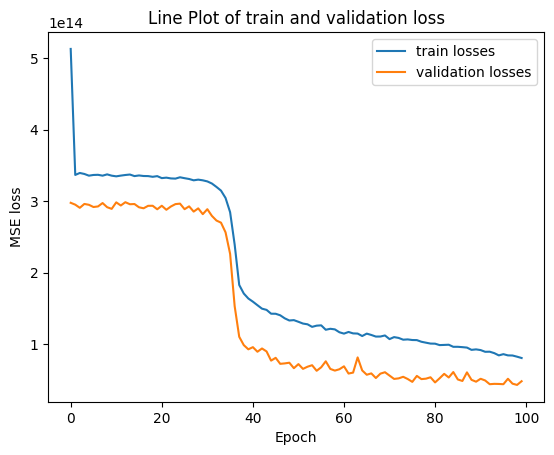

In [10]:
plt.plot(train_losses, label = 'train losses')
plt.plot(validation_losses, label = 'validation losses')
plt.xlabel('Epoch')
plt.ylabel('MSE loss')
plt.title('Line Plot of train and validation loss')
plt.legend()
plt.show()

MSE Loss: 120673112424448.0


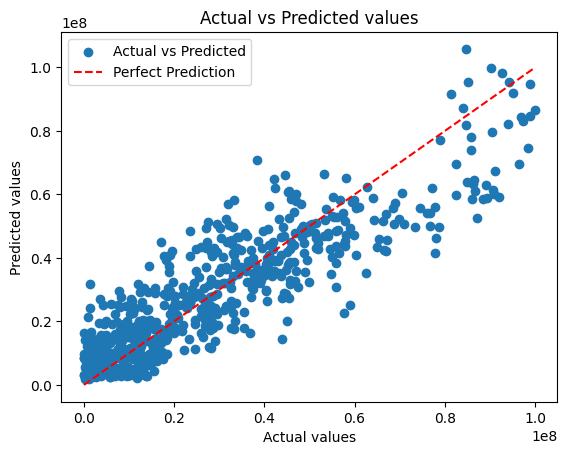

In [11]:
model = GCN_pairs_distance(input_features=dataset.num_node_features, hidden_channels=64, output_embeddings=300, name='GCN_L1_Counts', dist = 'L1').to(device)
model.load_state_dict(torch.load("models/GCN_L1_Counts.pt"))
y, predictions = score(model, test_loader)
plot_results(y, predictions)

In [12]:
train_loader, val_loader, test_loader = prepare_dataloader_distance_scale('data/homomorphism_counts/MUTAG_full_kernel_max_20_run1.homson', dataset, batch_size=32, dist='L1', device = device, scaling = 'counts_density')

In [13]:
model = GCN_pairs_distance(input_features=dataset.num_node_features, hidden_channels=64, output_embeddings=300, name='GCN_L1_Counts_Density', dist = 'L1').to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.MSELoss().to(device)

In [14]:
train_losses, validation_losses = training_loop(model, train_loader, optimizer, criterion, val_loader, epoch_number=100, return_losses=True)

Epoch: 10 | Time for 10 epochs: 0m 21s
	Train Loss: 0.001
	 Val. Loss: 0.001
Epoch: 20 | Time for 10 epochs: 0m 20s
	Train Loss: 0.003
	 Val. Loss: 0.001
Epoch: 30 | Time for 10 epochs: 0m 20s
	Train Loss: 0.002
	 Val. Loss: 0.001
Epoch: 40 | Time for 10 epochs: 0m 20s
	Train Loss: 0.001
	 Val. Loss: 0.001
Epoch: 50 | Time for 10 epochs: 0m 20s
	Train Loss: 0.002
	 Val. Loss: 0.001
Epoch: 60 | Time for 10 epochs: 0m 19s
	Train Loss: 0.002
	 Val. Loss: 0.001
Epoch: 70 | Time for 10 epochs: 0m 28s
	Train Loss: 0.001
	 Val. Loss: 0.001
Epoch: 80 | Time for 10 epochs: 0m 26s
	Train Loss: 0.001
	 Val. Loss: 0.001
Epoch: 90 | Time for 10 epochs: 0m 24s
	Train Loss: 0.326
	 Val. Loss: 0.001
Epoch: 100 | Time for 10 epochs: 0m 24s
	Train Loss: 0.001
	 Val. Loss: 0.001
Best epoch was 36


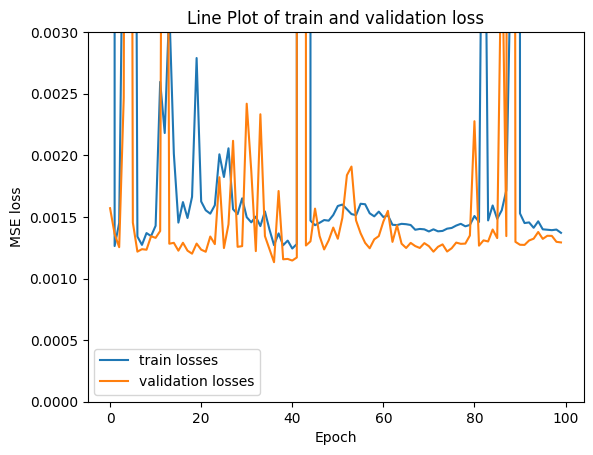

In [20]:
plt.plot(train_losses, label = 'train losses')
plt.plot(validation_losses, label = 'validation losses')
plt.xlabel('Epoch')
plt.ylabel('MSE loss')
plt.ylim(0, 0.003)
plt.title('Line Plot of train and validation loss')
plt.legend()
plt.show()

MSE Loss: 0.0013371139066293836


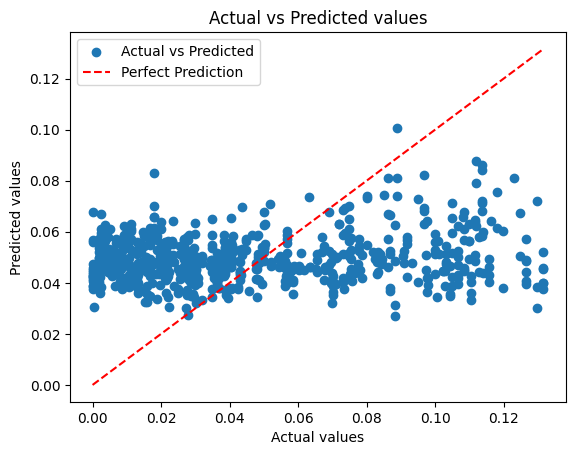

In [21]:
model = GCN_pairs_distance(input_features=dataset.num_node_features, hidden_channels=64, output_embeddings=300, name='GCN_L1_Counts_Density', dist = 'L1').to(device)
model.load_state_dict(torch.load("models/GCN_L1_Counts_Density.pt"))
y, predictions = score(model, test_loader)
plot_results(y, predictions)

### Results with different choices for cosine distance.
Here we use:
- cosine distance based on homomorphism counts
- cosine distance with homomorphism count densities

In [3]:
train_loader, val_loader, test_loader = prepare_dataloader_distance_scale('data/homomorphism_counts/MUTAG_full_kernel_max_20_run1.homson', dataset, batch_size=32, dist='cosine', device = device, scaling = 'counts')

In [4]:
model = GCN_pairs_distance(input_features=dataset.num_node_features, hidden_channels=64, output_embeddings=300, name='GCN_cosine_counts', dist = 'cosine').to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.MSELoss().to(device)

In [5]:
train_losses, validation_losses = training_loop(model, train_loader, optimizer, criterion, val_loader, epoch_number=50, return_losses=True)

Epoch: 10 | Time for 10 epochs: 0m 25s
	Train Loss: 0.000
	 Val. Loss: 0.000
Epoch: 20 | Time for 10 epochs: 0m 28s
	Train Loss: 0.000
	 Val. Loss: 0.000
Epoch: 30 | Time for 10 epochs: 0m 41s
	Train Loss: 0.000
	 Val. Loss: 0.000
Epoch: 40 | Time for 10 epochs: 0m 38s
	Train Loss: 0.000
	 Val. Loss: 0.000
Epoch: 50 | Time for 10 epochs: 0m 34s
	Train Loss: 0.000
	 Val. Loss: 0.000
Best epoch was 49


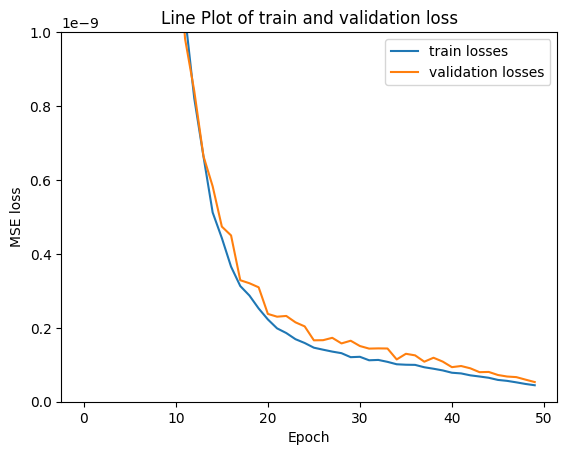

In [9]:
plt.plot(train_losses, label = 'train losses')
plt.plot(validation_losses, label = 'validation losses')
plt.xlabel('Epoch')
plt.ylabel('MSE loss')
plt.title('Line Plot of train and validation loss')
plt.legend()
plt.ylim(0, 0.000000001)
plt.show()

MSE Loss: 2.9044943533618195e-11


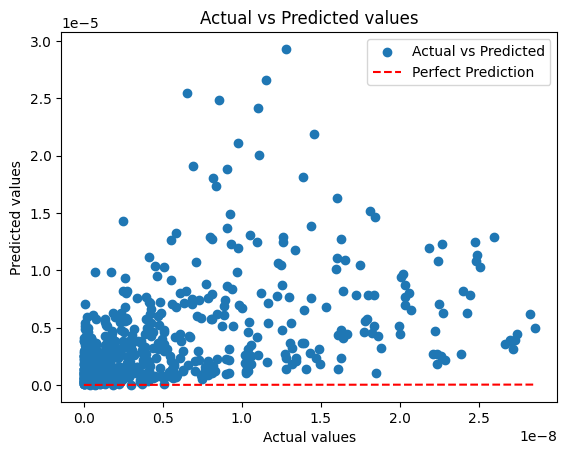

In [10]:
model = GCN_pairs_distance(input_features=dataset.num_node_features, hidden_channels=64, output_embeddings=300, name='GCN_cosine_counts', dist = 'cosine').to(device)
model.load_state_dict(torch.load("models/GCN_cosine_counts.pt"))
y, predictions = score(model, test_loader)
plot_results(y, predictions)

In [11]:
train_loader, val_loader, test_loader = prepare_dataloader_distance_scale('data/homomorphism_counts/MUTAG_full_kernel_max_20_run1.homson', dataset, batch_size=32, dist='cosine', device = device, scaling = 'counts_density')

In [12]:
model = GCN_pairs_distance(input_features=dataset.num_node_features, hidden_channels=64, output_embeddings=300, name='GCN_cosine_counts_density', dist = 'cosine').to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.MSELoss().to(device)

In [13]:
train_losses, validation_losses = training_loop(model, train_loader, optimizer, criterion, val_loader, epoch_number=100, return_losses=True)

Epoch: 10 | Time for 10 epochs: 0m 25s
	Train Loss: 0.000
	 Val. Loss: 0.000
Epoch: 20 | Time for 10 epochs: 0m 28s
	Train Loss: 0.000
	 Val. Loss: 0.000
Epoch: 30 | Time for 10 epochs: 0m 28s
	Train Loss: 0.000
	 Val. Loss: 0.000
Epoch: 40 | Time for 10 epochs: 0m 32s
	Train Loss: 0.000
	 Val. Loss: 0.000
Epoch: 50 | Time for 10 epochs: 0m 36s
	Train Loss: 0.000
	 Val. Loss: 0.000
Epoch: 60 | Time for 10 epochs: 0m 32s
	Train Loss: 0.000
	 Val. Loss: 0.000
Epoch: 70 | Time for 10 epochs: 0m 36s
	Train Loss: 0.000
	 Val. Loss: 0.000
Epoch: 80 | Time for 10 epochs: 0m 38s
	Train Loss: 0.000
	 Val. Loss: 0.000
Epoch: 90 | Time for 10 epochs: 0m 35s
	Train Loss: 0.000
	 Val. Loss: 0.000
Epoch: 100 | Time for 10 epochs: 0m 31s
	Train Loss: 0.000
	 Val. Loss: 0.000
Best epoch was 71


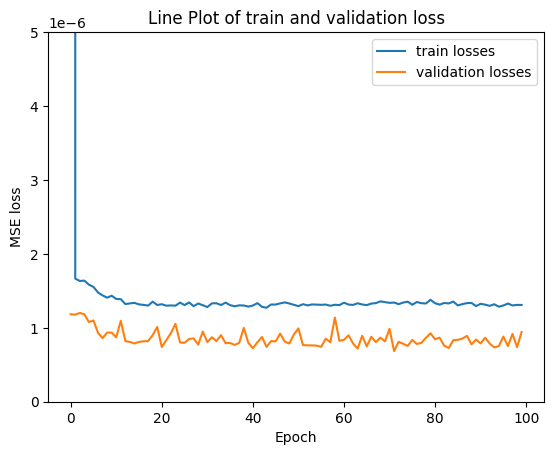

In [17]:
plt.plot(train_losses, label = 'train losses')
plt.plot(validation_losses, label = 'validation losses')
plt.xlabel('Epoch')
plt.ylabel('MSE loss')
plt.title('Line Plot of train and validation loss')
plt.ylim(0, 0.000005)
plt.legend()
plt.show()

MSE Loss: 1.3882557823308161e-06


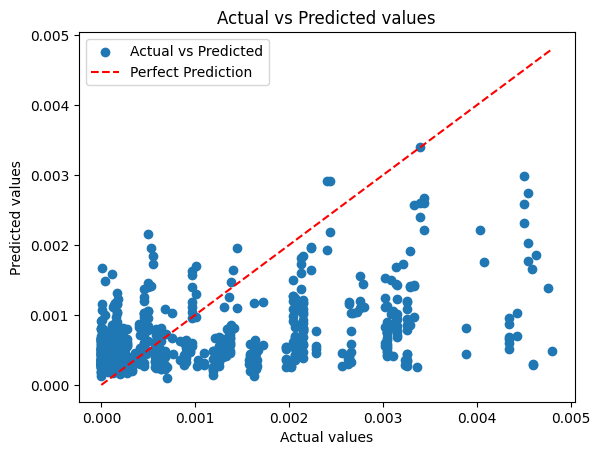

In [18]:
model = GCN_pairs_distance(input_features=dataset.num_node_features, hidden_channels=64, output_embeddings=300, name='GCN_cosine_counts_density', dist = 'cosine').to(device)
model.load_state_dict(torch.load("models/GCN_cosine_counts_density.pt"))
y, predictions = score(model, test_loader)
plot_results(y, predictions)